In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
def show_images(dataloader):
    inputs, labels = next(iter(dataloader))
    fig, axes = plt.subplots(2, 3, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        img = inputs[i]
        # Convert from channels-first (C, H, W) to channels-last (H, W, C)
        img = img.permute(1, 2, 0)
        # Convert tensor to numpy array
        img = img.numpy()
        # Normalize if the data is float and values are in [0,255]
        if img.dtype == np.float32 or img.dtype == np.float64:
            # Check if the max value is greater than 1 (indicating [0,255] scale)
            if img.max() > 1.0:
                img = img / 255.0
        ax.imshow(img)
        ax.set_title(f"Label: {labels[i].item()}")
        ax.axis("off")
    plt.show()

dict_keys(['train_0.005', 'train_0.01', 'train_0.02', 'train_0.05', 'train_0.10', 'train_0.20', 'test'])


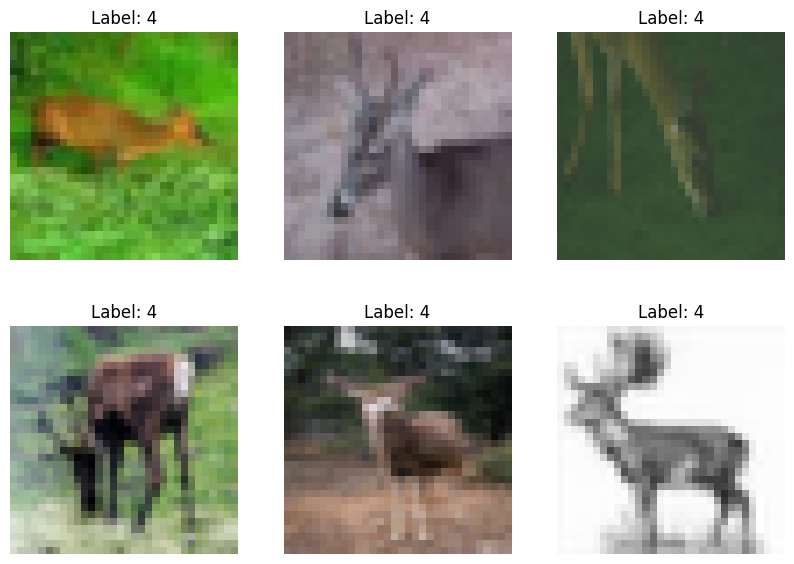

In [11]:
import pickle
file_name = "/Users/max/MasterThesisData/Binary_CIFAR10_DataLoader.pkl"
with open(file_name, "rb") as f:
    Binary_CIFAR10 = pickle.load(f)

print(Binary_CIFAR10.keys())
train_data_0005 = Binary_CIFAR10["train_0.005"]
show_images(train_data_0005)

In [12]:
import torch
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
import random
random.seed(42)
from sklearn import svm
from sklearn.preprocessing import StandardScaler
train_data_0005 = Binary_CIFAR10["train_0.005"]
train_data_001 = Binary_CIFAR10["train_0.01"]
train_data_002 = Binary_CIFAR10["train_0.02"]
train_data_005 = Binary_CIFAR10["train_0.05"]
train_data_010 = Binary_CIFAR10["train_0.10"]
train_data_020 = Binary_CIFAR10["train_0.20"]
test_data = Binary_CIFAR10["test"]

### 0.5\%

In [13]:
Train_DataLoader = train_data_0005 # 0.005 0.5%
Test_DataLoader = test_data
print("Dataset: Binary_CIFAR10")
print("Imbalanced Ratio: 0.005")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
# labels = np.unique(y_train)
# print("Labels:", labels)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)


import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_CIFAR10
Imbalanced Ratio: 0.005
3 is negative, 4 is positive
Train_label3: 25
Train_label4: 5000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (5025, 3072)
y_train.shape: (5025,)
X_test.shape: (2000, 3072)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 997
FP: 973
FN: 3
TN: 27
Accuracy: 0.5120
Misclassification rate: 0.4880
Sensitivity (Recall): 0.9970
Specificity: 0.0270
Precision: 0.5061
Negative Predictive Value: 0.9000
G-mean: 0.1641
F-measure: 0.6714
Discriminant Power: 1.2248
F2-measure: 0.5614
InvF0.5-measure: 0.8350
AGF: 0.6847
Balanced Accuracy: 0.5120
Matthew's Correlation Coefficient: 0.0987
Cohen's Kappa: 0.0240
Youden's Index: 0.0240
Positive Likelihood Ratio: 1.0247
Negative Likelihood Ratio: 0.1111
None


### 1%

In [14]:
Train_DataLoader = train_data_001 # 0.01 1%
Test_DataLoader = test_data
print("Dataset: Binary_CIFAR10")
print("Imbalanced Ratio: 0.01")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_CIFAR10
Imbalanced Ratio: 0.01
3 is negative, 4 is positive
Train_label3: 50
Train_label4: 5000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (5050, 3072)
y_train.shape: (5050,)
X_test.shape: (2000, 3072)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 990
FP: 940
FN: 10
TN: 60
Accuracy: 0.5250
Misclassification rate: 0.4750
Sensitivity (Recall): 0.9900
Specificity: 0.0600
Precision: 0.5130
Negative Predictive Value: 0.8571
G-mean: 0.2437
F-measure: 0.6758
Discriminant Power: 1.0164
F2-measure: 0.5677
InvF0.5-measure: 0.8347
AGF: 0.6884
Balanced Accuracy: 0.5250
Matthew's Correlation Coefficient: 0.1360
Cohen's Kappa: 0.0500
Youden's Index: 0.0500
Positive Likelihood Ratio: 1.0532
Negative Likelihood Ratio: 0.1667
None


### 2%

In [15]:
Train_DataLoader = train_data_002 # 0.02 2%
Test_DataLoader = test_data
print("Dataset: Binary_CIFAR10")
print("Imbalanced Ratio: 0.02")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_CIFAR10
Imbalanced Ratio: 0.02
3 is negative, 4 is positive
Train_label3: 100
Train_label4: 5000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (5100, 3072)
y_train.shape: (5100,)
X_test.shape: (2000, 3072)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 970
FP: 884
FN: 30
TN: 116
Accuracy: 0.5430
Misclassification rate: 0.4570
Sensitivity (Recall): 0.9700
Specificity: 0.1160
Precision: 0.5232
Negative Predictive Value: 0.7945
G-mean: 0.3354
F-measure: 0.6797
Discriminant Power: 0.7968
F2-measure: 0.5763
InvF0.5-measure: 0.8285
AGF: 0.6910
Balanced Accuracy: 0.5430
Matthew's Correlation Coefficient: 0.1653
Cohen's Kappa: 0.0860
Youden's Index: 0.0860
Positive Likelihood Ratio: 1.0973
Negative Likelihood Ratio: 0.2586
None


### 5%

In [16]:
Train_DataLoader = train_data_005 # 0.05 5%
Test_DataLoader = test_data
print("Dataset: Binary_CIFAR10")
print("Imbalanced Ratio: 0.05")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_CIFAR10
Imbalanced Ratio: 0.05
3 is negative, 4 is positive
Train_label3: 250
Train_label4: 5000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (5250, 3072)
y_train.shape: (5250,)
X_test.shape: (2000, 3072)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 928
FP: 811
FN: 72
TN: 189
Accuracy: 0.5585
Misclassification rate: 0.4415
Sensitivity (Recall): 0.9280
Specificity: 0.1890
Precision: 0.5336
Negative Predictive Value: 0.7241
G-mean: 0.4188
F-measure: 0.6776
Discriminant Power: 0.6064
F2-measure: 0.5832
InvF0.5-measure: 0.8085
AGF: 0.6867
Balanced Accuracy: 0.5585
Matthew's Correlation Coefficient: 0.1737
Cohen's Kappa: 0.1170
Youden's Index: 0.1170
Positive Likelihood Ratio: 1.1443
Negative Likelihood Ratio: 0.3810
None


### 10%

In [17]:
Train_DataLoader = train_data_010 # 0.1 10%
Test_DataLoader = test_data
print("Dataset: Binary_CIFAR10")
print("Imbalanced Ratio: 0.10")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_CIFAR10
Imbalanced Ratio: 0.10
3 is negative, 4 is positive
Train_label3: 500
Train_label4: 5000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (5500, 3072)
y_train.shape: (5500,)
X_test.shape: (2000, 3072)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 881
FP: 696
FN: 119
TN: 304
Accuracy: 0.5925
Misclassification rate: 0.4075
Sensitivity (Recall): 0.8810
Specificity: 0.3040
Precision: 0.5587
Negative Predictive Value: 0.7187
G-mean: 0.5175
F-measure: 0.6837
Discriminant Power: 0.6470
F2-measure: 0.6028
InvF0.5-measure: 0.7899
AGF: 0.6900
Balanced Accuracy: 0.5925
Matthew's Correlation Coefficient: 0.2265
Cohen's Kappa: 0.1850
Youden's Index: 0.1850
Positive Likelihood Ratio: 1.2658
Negative Likelihood Ratio: 0.3914
None


### 20%

In [18]:
Train_DataLoader = train_data_020 # 0.2 20%
Test_DataLoader = test_data
print("Dataset: Binary_CIFAR10")
print("Imbalanced Ratio: 0.20")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("3 is negative, 4 is positive")
train_label3 = np.count_nonzero(y_train == 3)
train_label4 = np.count_nonzero(y_train == 4)
print("Train_label3:", train_label3)
print("Train_label4:", train_label4)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label3 = np.count_nonzero(y_test == 3)
test_label4 = np.count_nonzero(y_test == 4)
print("Test_label3:", test_label3)
print("Test_label4:", test_label4)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary_got_cofusion_matrix(y_test, y_pred, labels = [4,3])
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary_CIFAR10
Imbalanced Ratio: 0.20
3 is negative, 4 is positive
Train_label3: 1000
Train_label4: 5000
Test_label3: 1000
Test_label4: 1000
X_train.shape: (6000, 3072)
y_train.shape: (6000,)
X_test.shape: (2000, 3072)
y_test.shape: (2000,)
y_pred.shape: (2000,)
TP: 844
FP: 630
FN: 156
TN: 370
Accuracy: 0.6070
Misclassification rate: 0.3930
Sensitivity (Recall): 0.8440
Specificity: 0.3700
Precision: 0.5726
Negative Predictive Value: 0.7034
G-mean: 0.5588
F-measure: 0.6823
Discriminant Power: 0.6374
F2-measure: 0.6119
InvF0.5-measure: 0.7709
AGF: 0.6868
Balanced Accuracy: 0.6070
Matthew's Correlation Coefficient: 0.2430
Cohen's Kappa: 0.2140
Youden's Index: 0.2140
Positive Likelihood Ratio: 1.3397
Negative Likelihood Ratio: 0.4216
None
